In [58]:
import os, joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from utils.Dataset import CraneDataset
from utils.detect_roll_over import calculate_load_margin
from tqdm.auto import tqdm

In [2]:
data_file_path_list = []
data_file_name_list = os.listdir('data')

for file_name in data_file_name_list:
    data_file_path_list.append(os.path.join('data', file_name))

In [3]:
dataset_inst = CraneDataset(data_file_path_list)
raw_dataset = dataset_inst.get_dataset()

feature_names = dataset_inst.get_data_feature_names()
target_names = dataset_inst.get_data_target_names()

for t_name in target_names:
    raw_dataset[t_name] = raw_dataset[t_name]/1000

# for t_name in target_names:
#     raw_dataset = raw_dataset[raw_dataset[t_name]>=0]
    
raw_dataset = raw_dataset[raw_dataset['Time(sec)']>5]

raw_dataset.reset_index(drop=True, inplace=True)

  0%|          | 0/22 [00:00<?, ?it/s]

In [4]:
left_load_name_list = ['Actual_Load_Left_1(N)', 'Actual_Load_Left_2(N)', 'Actual_Load_Left_3(N)', 'Actual_Load_Left_4(N)', 'Actual_Load_Left_5(N)']
right_load_name_list = ['Actual_Load_Right_1(N)', 'Actual_Load_Right_2(N)', 'Actual_Load_Right_3(N)', 'Actual_Load_Right_4(N)', 'Actual_Load_Right_5(N)']

front_load_name_list = ['Actual_Load_Left_1(N)', 'Actual_Load_Left_2(N)', 'Actual_Load_Right_1(N)', 'Actual_Load_Right_2(N)']
rear_load_name_list = ['Actual_Load_Left_4(N)', 'Actual_Load_Left_5(N)', 'Actual_Load_Right_4(N)', 'Actual_Load_Right_5(N)']

In [26]:
for i in range(22):
    data_sample = raw_dataset[raw_dataset['file_idx']==i]

In [60]:
n_file = int(raw_dataset['file_idx'].max())
data_sample = raw_dataset[raw_dataset['file_idx']==11]
time_arr = data_sample['Time(sec)'].to_numpy()

In [28]:
data_sample['safe_state'].iloc[0]

1.0

  0%|          | 0/21 [00:00<?, ?it/s]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23240\1332012938.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


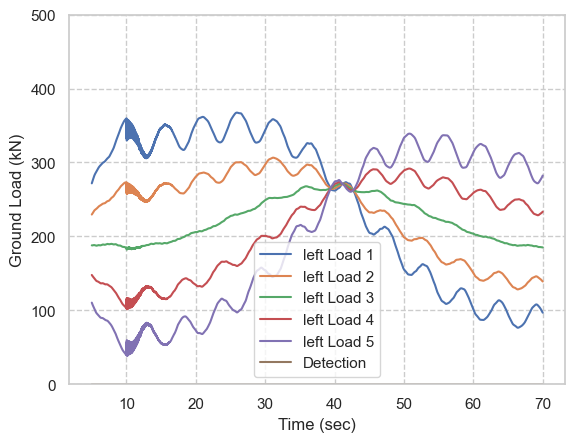

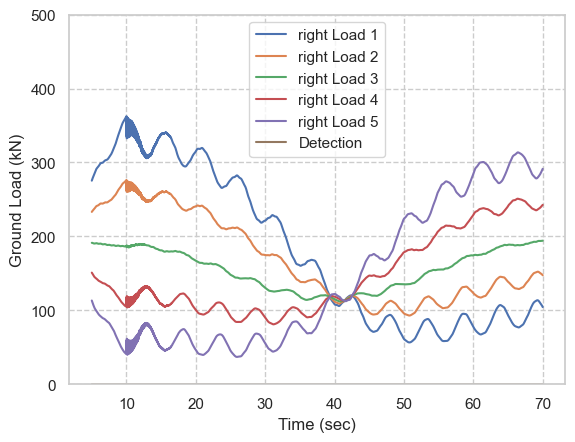

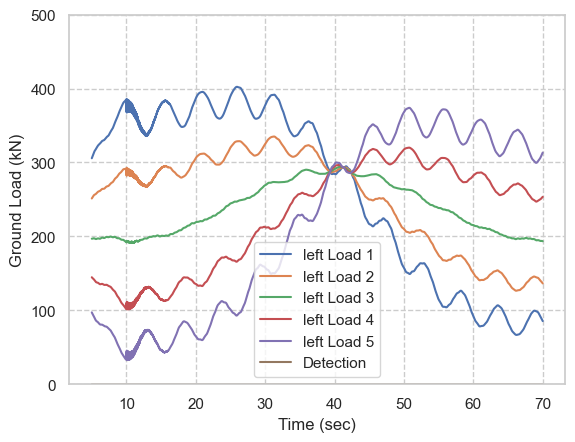

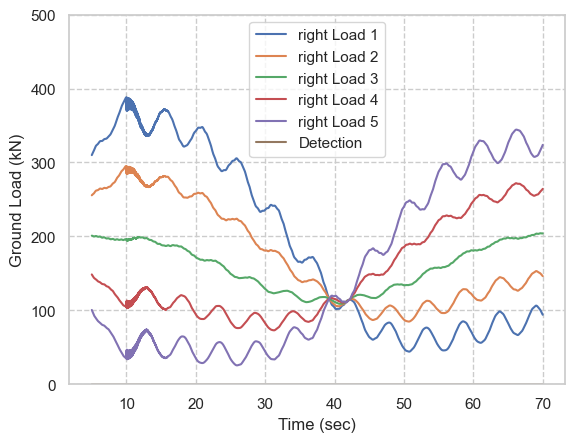

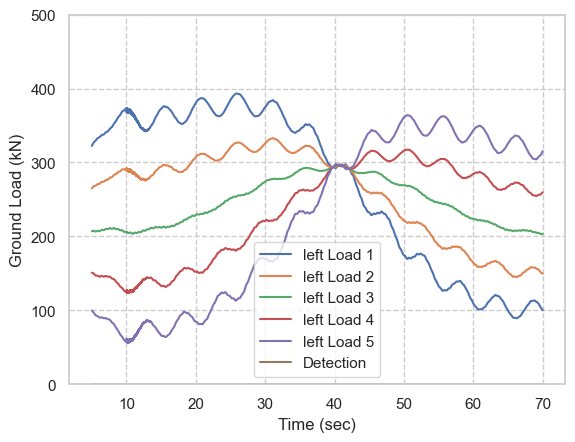

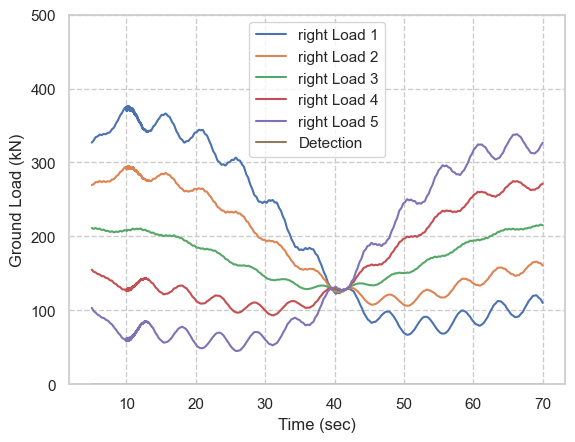

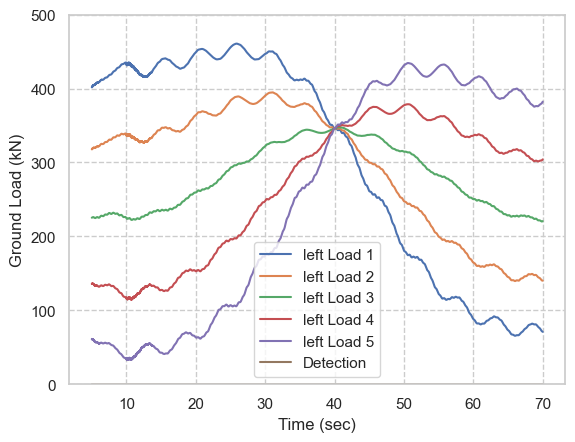

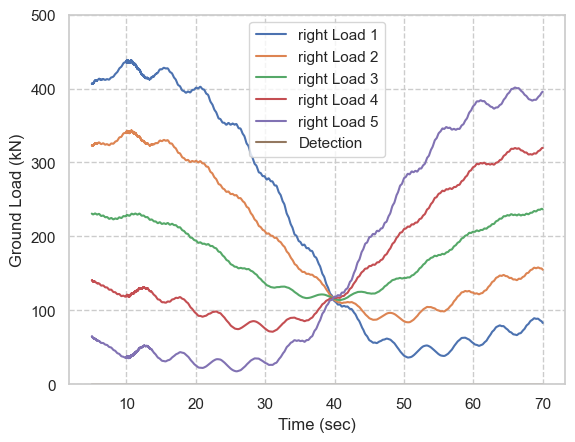

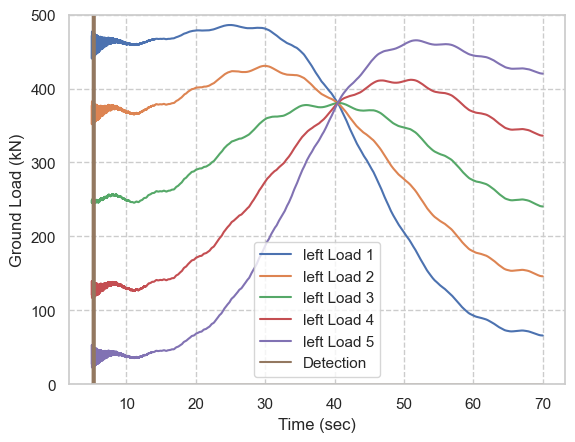

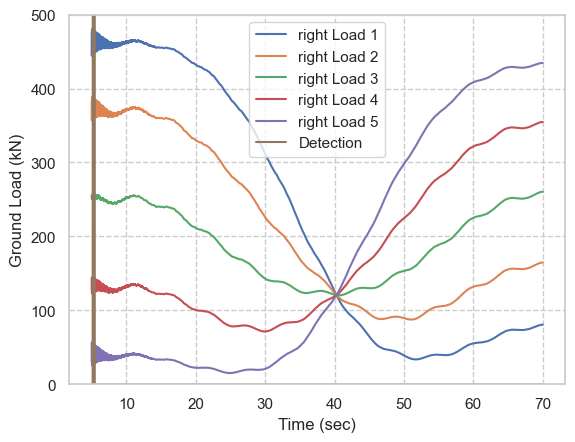

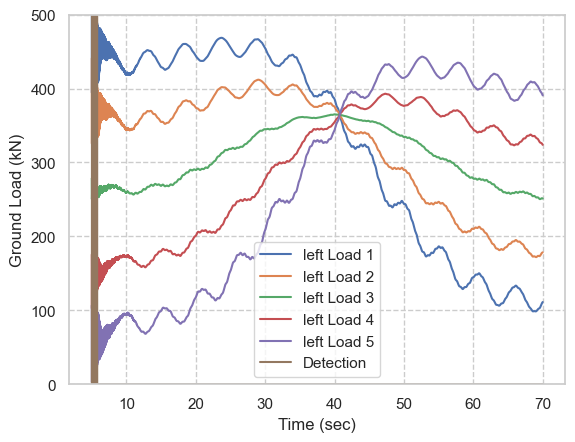

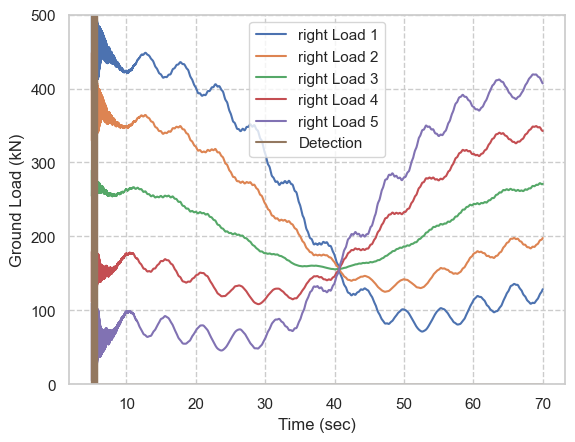

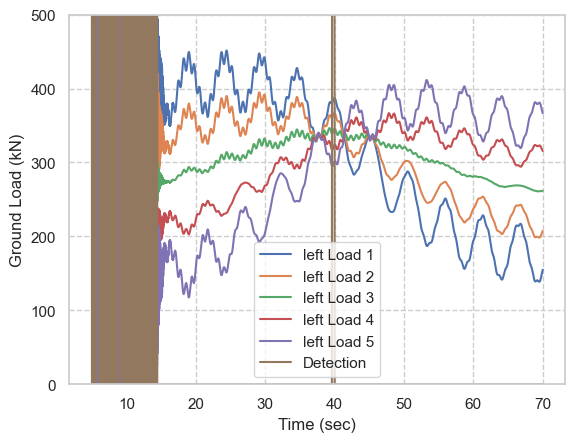

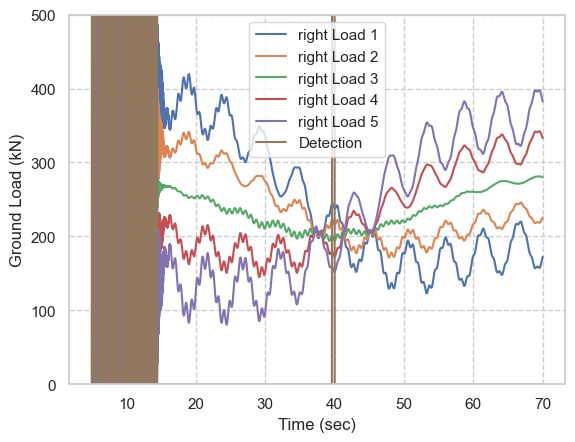

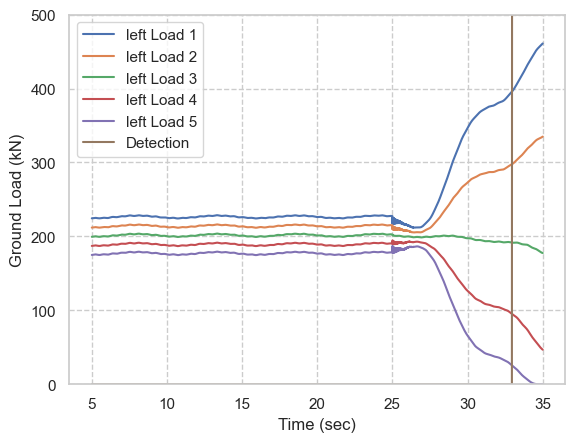

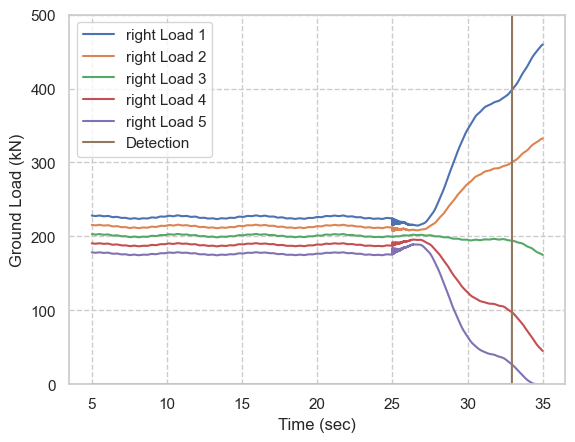

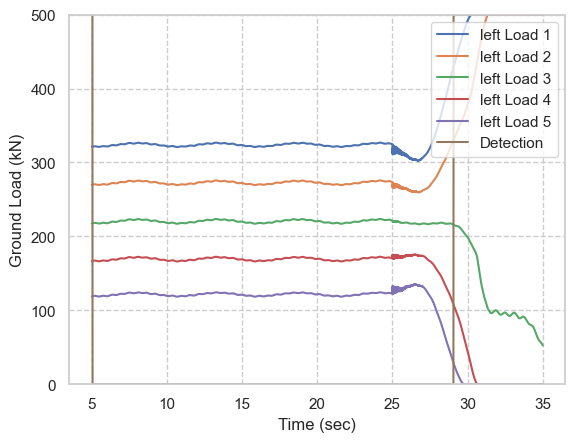

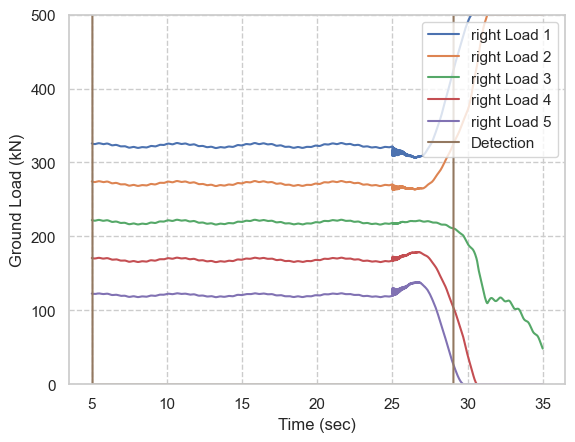

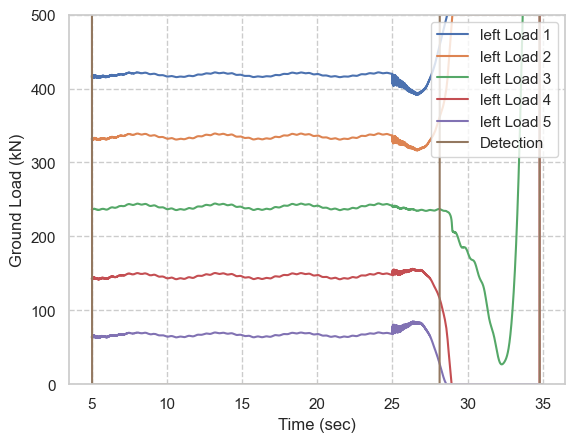

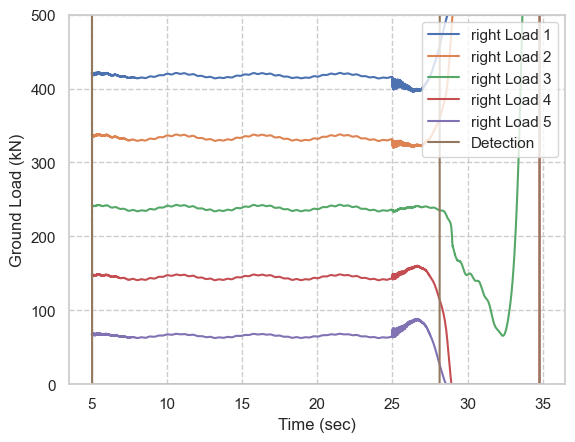

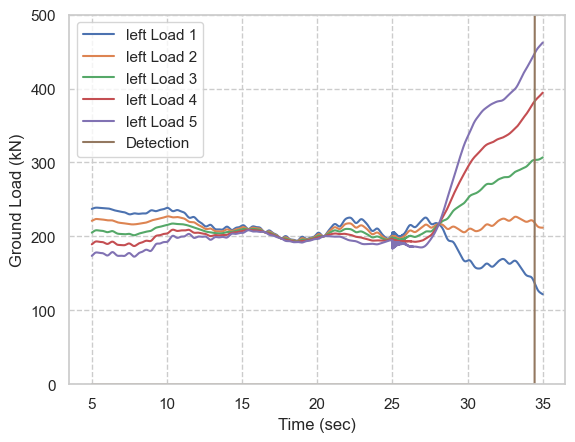

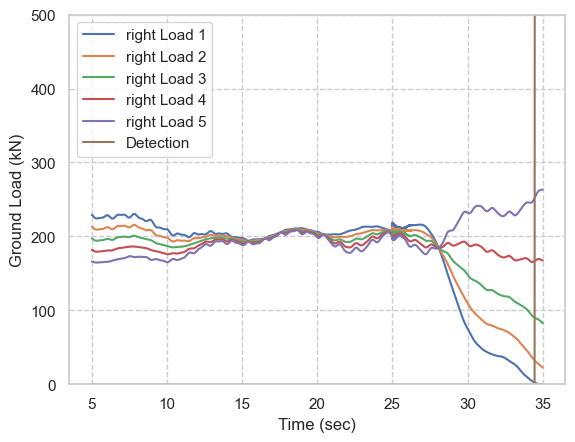

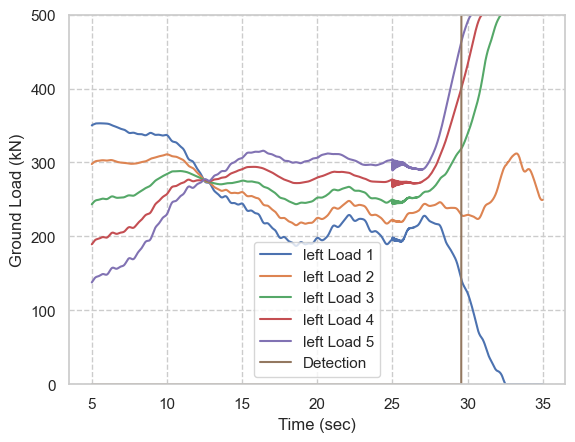

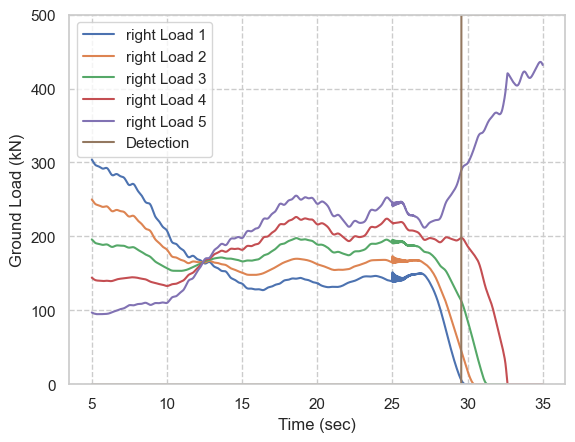

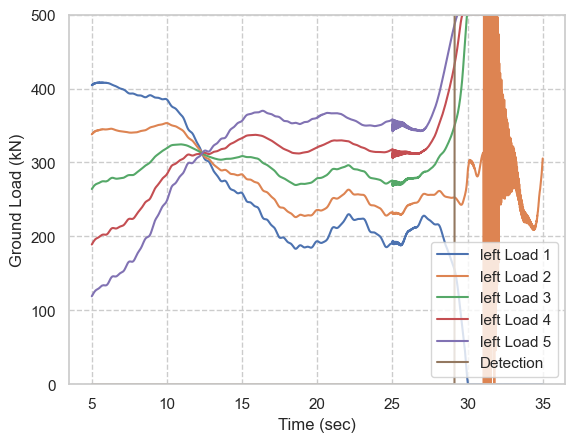

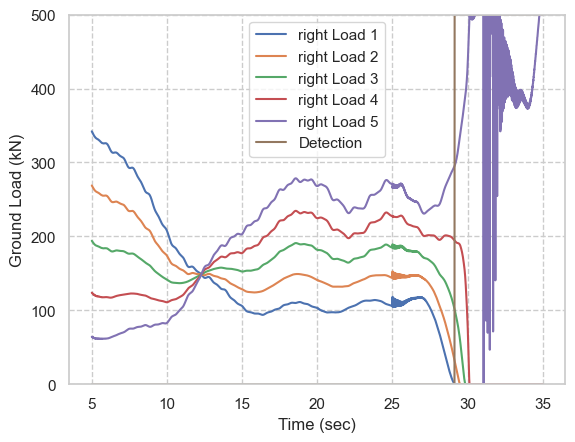

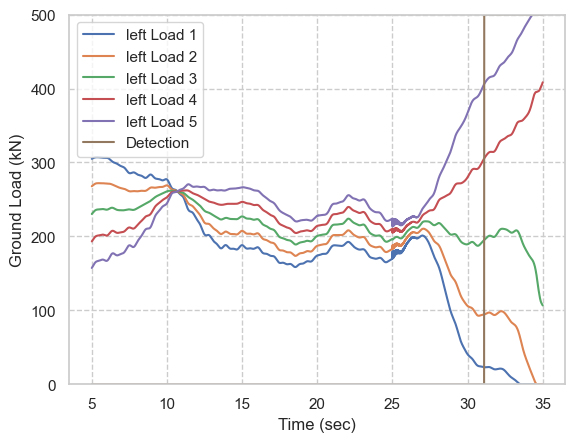

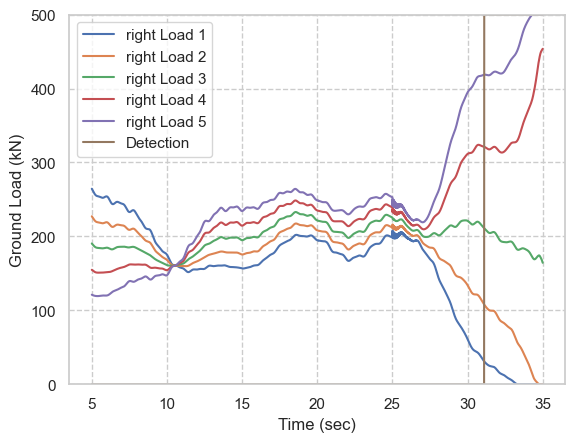

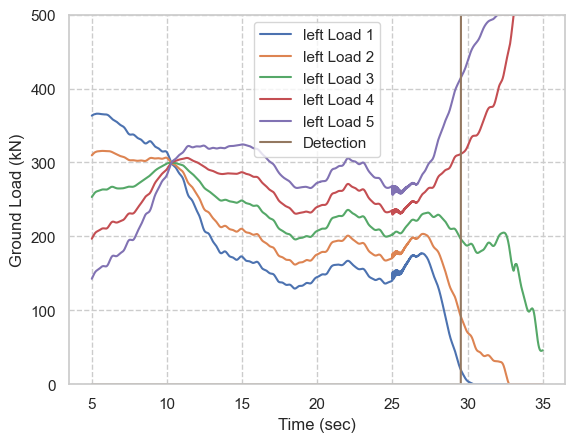

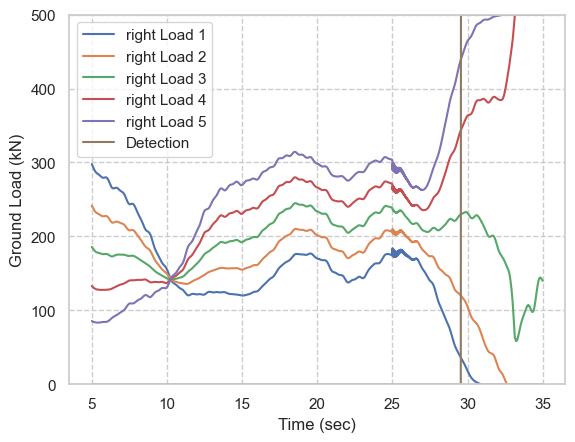

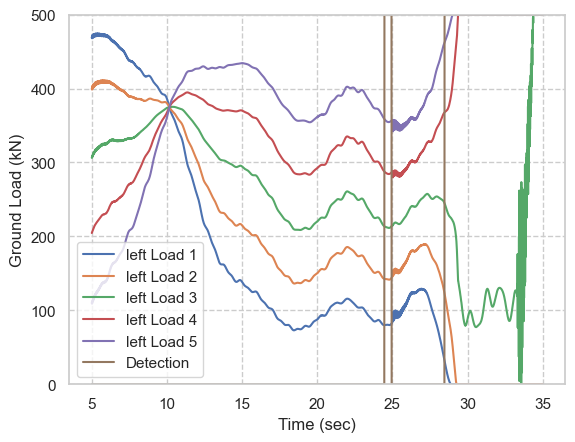

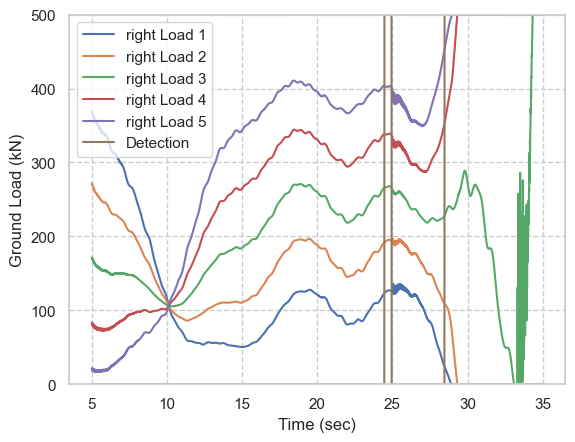

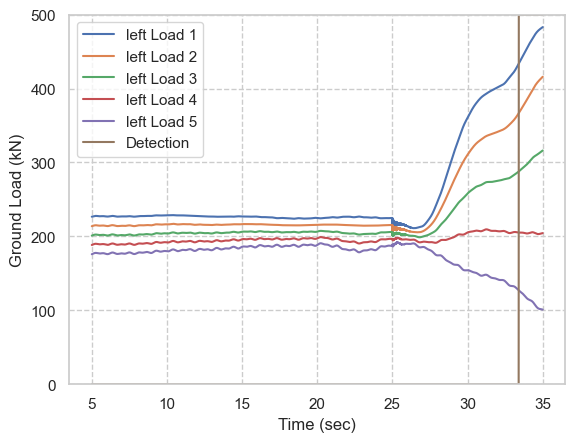

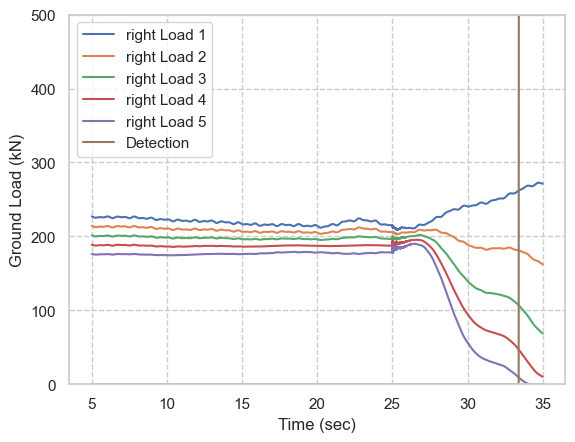

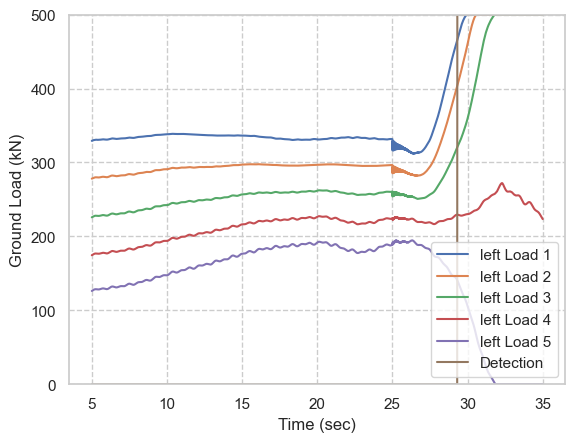

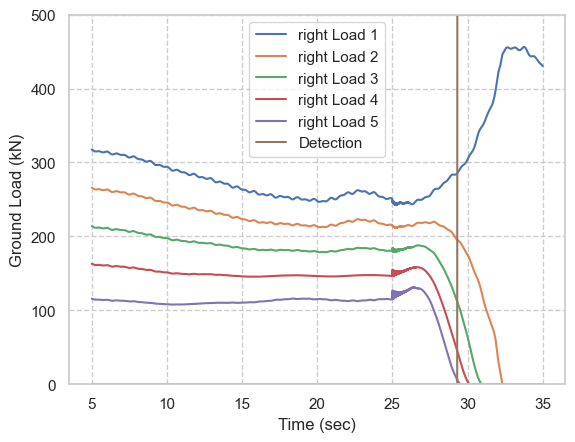

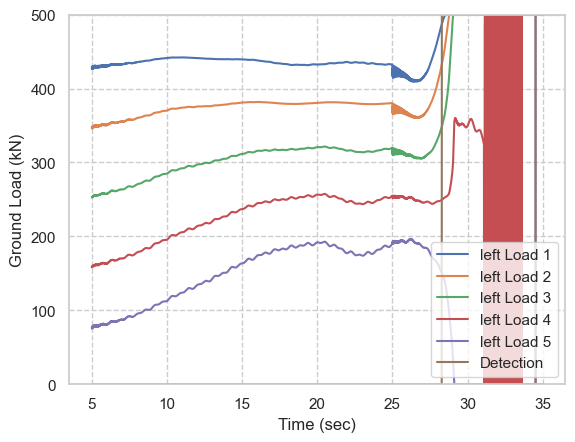

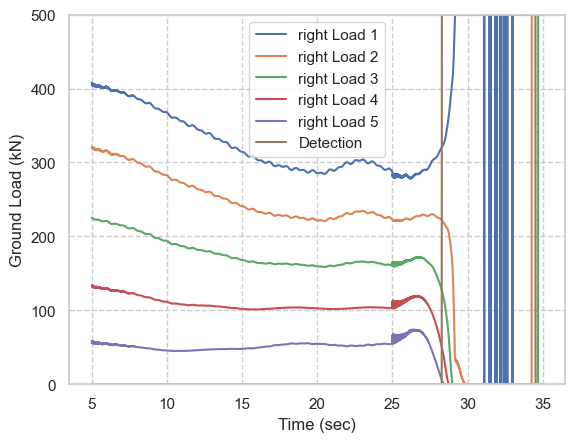

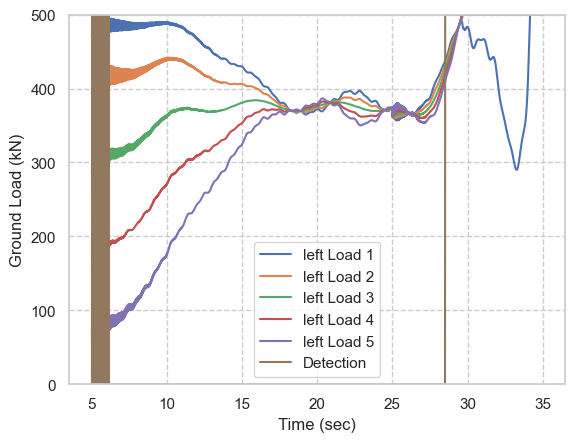

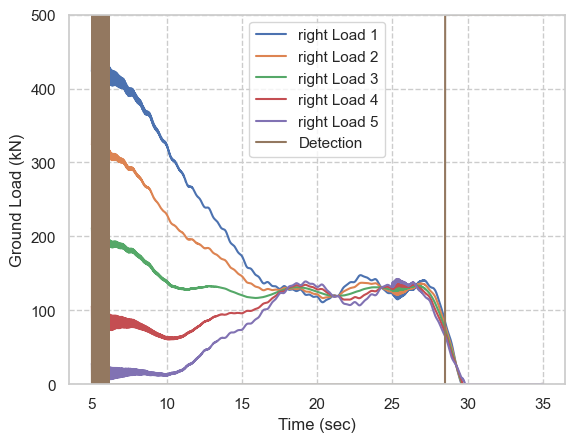

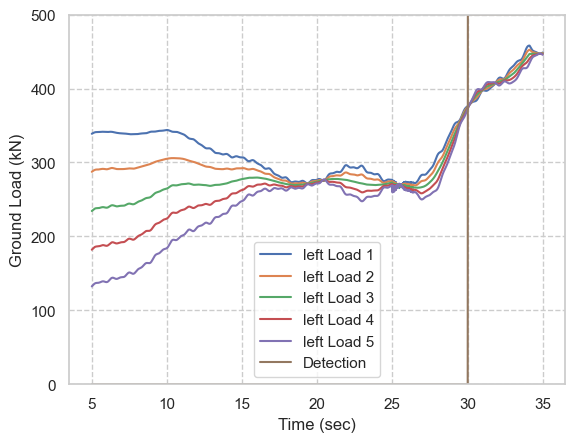

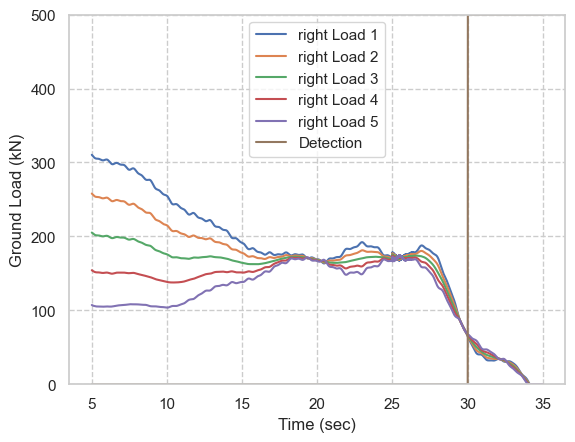

In [64]:
for file_idx in tqdm(range(n_file)):
    data_sample = raw_dataset[raw_dataset['file_idx']==file_idx]
    time_arr = data_sample['Time(sec)'].to_numpy()
    
    left_load_margin_list = []
    right_load_margin_list = []
    front_load_margin_list = []
    rear_load_margin_list = []
    roll_over_det_list = []

    for i in range(data_sample.shape[0]):
        sample = data_sample.iloc[i, :]
        load_arr = sample[left_load_name_list+right_load_name_list].to_numpy()
        swing_angle = sample['Swing_Angle(deg)']
        
        load_margin_array, rollover_det = calculate_load_margin(ground_load=load_arr, swing_angle=swing_angle)
        
        left_load_margin_list.append(load_margin_array[0])
        right_load_margin_list.append(load_margin_array[1])
        front_load_margin_list.append(load_margin_array[2])
        rear_load_margin_list.append(load_margin_array[3])
        roll_over_det_list.append(rollover_det)

    roll_over_det_list = np.array(roll_over_det_list)
    
    plt.figure()

    for i in range(len(left_load_name_list)):
        sns.lineplot(x=time_arr, y=data_sample[left_load_name_list[i]], label=f'left Load {i+1}')

    sns.lineplot(x=time_arr, y=roll_over_det_list*500, label='Detection')

    plt.xlabel('Time (sec)')
    plt.ylim(0, 500)
    plt.ylabel('Ground Load (kN)')
    
    plt.savefig(os.path.join('results', f'left_load_{file_idx}.jpg'), dpi=600, bbox_inches='tight')
    
    plt.figure()
    
    for i in range(len(right_load_name_list)):
        sns.lineplot(x=time_arr, y=data_sample[right_load_name_list[i]], label=f'right Load {i+1}')

    sns.lineplot(x=time_arr, y=roll_over_det_list*500, label='Detection')

    plt.xlabel('Time (sec)')
    plt.ylim(0, 500)
    plt.ylabel('Ground Load (kN)')
    
    plt.savefig(os.path.join('results', f'right_load_{file_idx}.jpg'), dpi=600, bbox_inches='tight')


Text(0, 0.5, 'Ground Load (kN)')

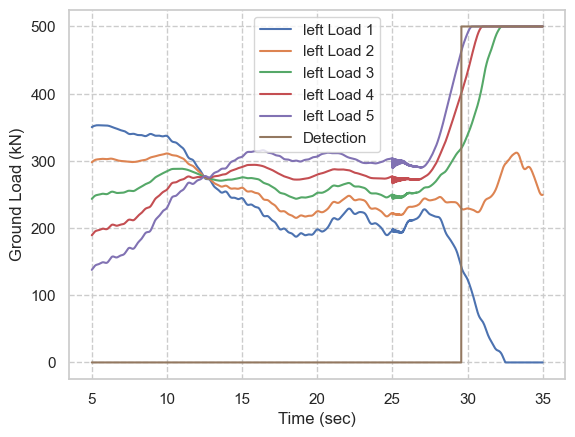

In [54]:
for i in range(len(left_load_name_list)):
    sns.lineplot(x=time_arr, y=data_sample[left_load_name_list[i]], label=f'left Load {i+1}')

sns.lineplot(x=time_arr, y=roll_over_det_list*500, label='Detection')

plt.xlabel('Time (sec)')
plt.ylabel('Ground Load (kN)')

Text(0, 0.5, 'Ground Load (kN)')

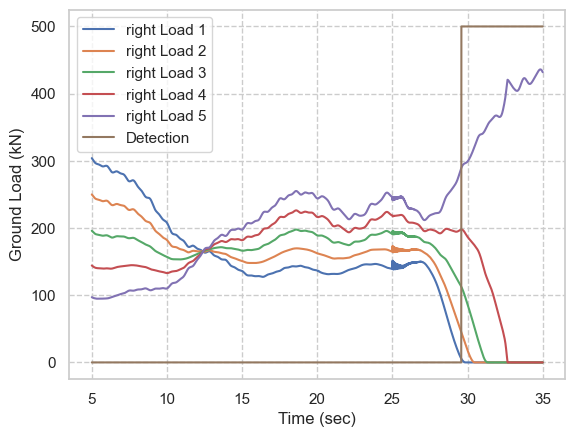

In [55]:
for i in range(len(right_load_name_list)):
    sns.lineplot(x=time_arr, y=data_sample[right_load_name_list[i]], label=f'right Load {i+1}')

sns.lineplot(x=time_arr, y=roll_over_det_list*500, label='Detection')

plt.xlabel('Time (sec)')
plt.ylabel('Ground Load (kN)')

In [ ]:
plt.savefig("bar_plot.png", dpi=300, bbox_inches='tight')  # PNG 파일로 저장

<Axes: >

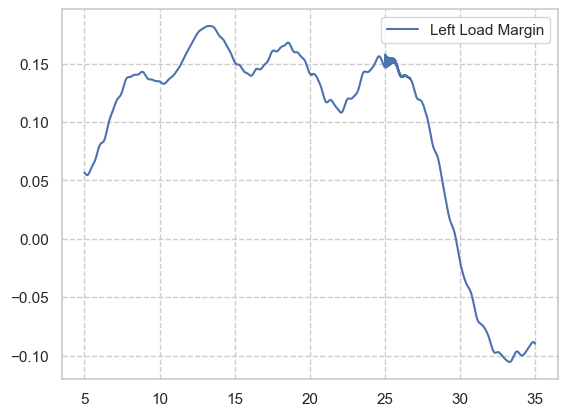

In [34]:
sns.set_theme(font_scale=1.0)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.lineplot(x=time_arr, y=left_load_margin_list, label='Left Load Margin')


<Axes: >

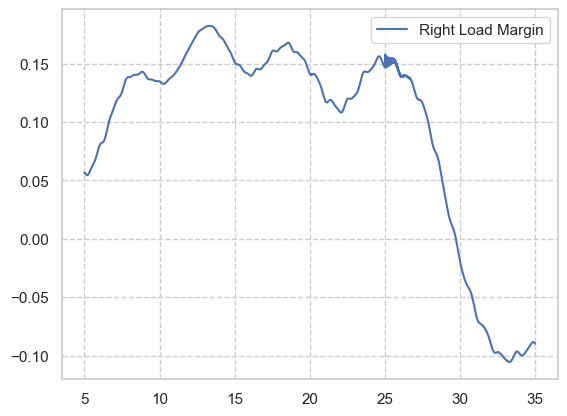

In [35]:
sns.set_theme(font_scale=1.0)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.lineplot(x=time_arr, y=right_load_margin_list, label='Right Load Margin')


<Axes: >

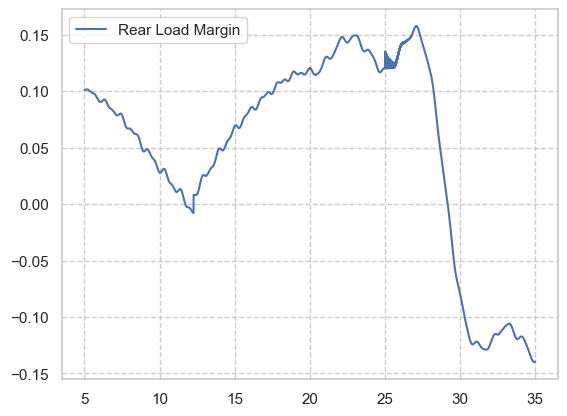

In [36]:
sns.set_theme(font_scale=1.0)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.lineplot(x=time_arr, y=rear_load_margin_list, label='Rear Load Margin')

<Axes: >

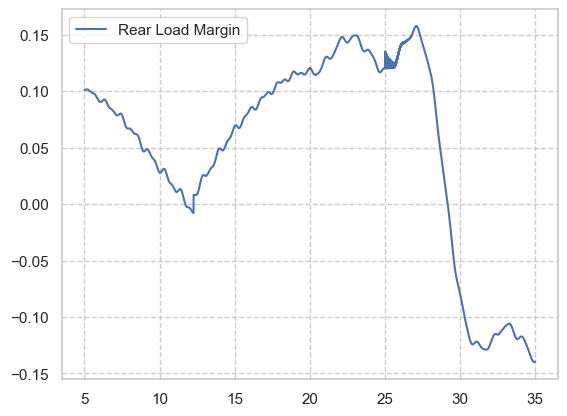

In [37]:
sns.set_theme(font_scale=1.0)
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.lineplot(x=time_arr, y=rear_load_margin_list, label='Rear Load Margin')